In [1]:
import os
import random

import openslide
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Plan on patching in real time to avoid memory usage

In [2]:
# set parameters
DATA_DIR = 'Data/'
MODE = "DEV"
EXT = '.tif'
PATCH_SIZE = 256
STRIDE = 128
MIN_TISSUE_RATIO = 0.5

# calculate
IMAGE_DIR = os.path.join(DATA_DIR, 'train_images')
PATCH_AREA = PATCH_SIZE * PATCH_SIZE
NUM_PATCH_PIXELS = PATCH_AREA*3

In [3]:
tif_imgs = list(filter(lambda img: img.endswith(EXT), os.listdir(IMAGE_DIR)))

In [15]:
random.sample(tif_imgs, k=1)

['1666.tif']

In [4]:
image_id = 1666

In [5]:
wsi = openslide.OpenSlide(os.path.join(IMAGE_DIR, f"{image_id}.tif"))

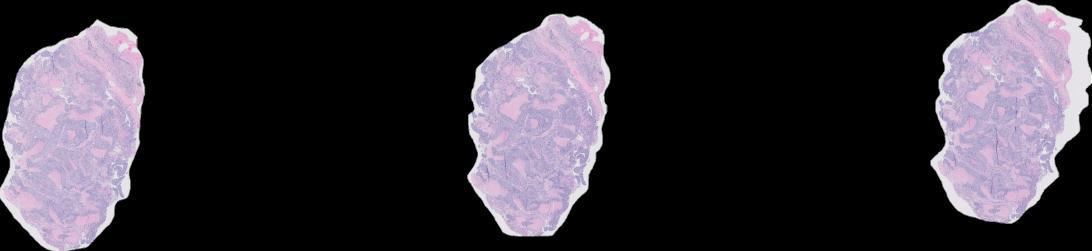

In [6]:
wsi.get_thumbnail(wsi.level_dimensions[-4])

In [7]:
print(wsi.level_count)
print(wsi.level_dimensions)
print(wsi.level_downsamples)

10
((69900, 16083), (34950, 8041), (17475, 4020), (8737, 2010), (4368, 1005), (2184, 502), (1092, 251), (546, 125), (273, 62), (136, 31))
(1.0, 2.0000621813207315, 4.000373134328358, 8.000975180182412, 16.00286616368706, 32.021671555536095, 64.04334311107219, 128.34298901098902, 257.7235909252038, 516.3885199240987)


In [25]:
wsi.properties

<_PropertyMap {'openslide.level-count': '10', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '16083', 'openslide.level[0].tile-height': '256', 'openslide.level[0].tile-width': '256', 'openslide.level[0].width': '69900', 'openslide.level[1].downsample': '2.0000621813207315', 'openslide.level[1].height': '8041', 'openslide.level[1].tile-height': '256', 'openslide.level[1].tile-width': '256', 'openslide.level[1].width': '34950', 'openslide.level[2].downsample': '4.0003731343283579', 'openslide.level[2].height': '4020', 'openslide.level[2].tile-height': '256', 'openslide.level[2].tile-width': '256', 'openslide.level[2].width': '17475', 'openslide.level[3].downsample': '8.0009751801824116', 'openslide.level[3].height': '2010', 'openslide.level[3].tile-height': '256', 'openslide.level[3].tile-width': '256', 'openslide.level[3].width': '8737', 'openslide.level[4].downsample': '16.002866163687059', 'openslide.level[4].height': '1005', 'openslide.level[4].tile-height': '256'

In [29]:
wsi_size = wsi.dimensions
print(wsi_size) #x, y

(69900, 16083)


Which level? 

Choose 0, assume images all same magnification for now. In reality level 0 is 20X for WSIs and 40X for TMAs.

Use read_region to select tiles

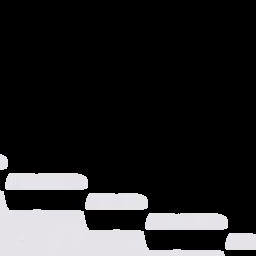

In [38]:
x, y = 69000, 1000
wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))

Mask shows artefacts

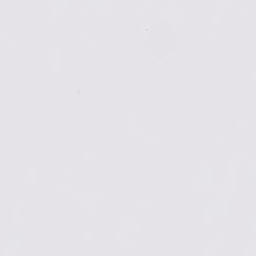

In [41]:
x, y = 69000, 3000
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile

In [74]:
tile_arr = np.array(tile)[..., :3]

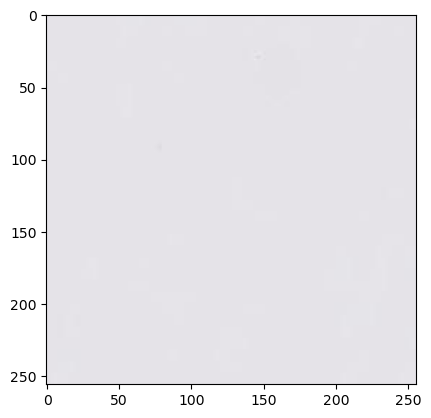

In [53]:
plt.imshow(tile_arr)

(array([1.30000e+01, 4.70000e+01, 1.24504e+05, 6.46170e+04, 7.42500e+03,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.55360e+04]),
 array([218. , 221.7, 225.4, 229.1, 232.8, 236.5, 240.2, 243.9, 247.6,
        251.3, 255. ]),
 <BarContainer object of 10 artists>)

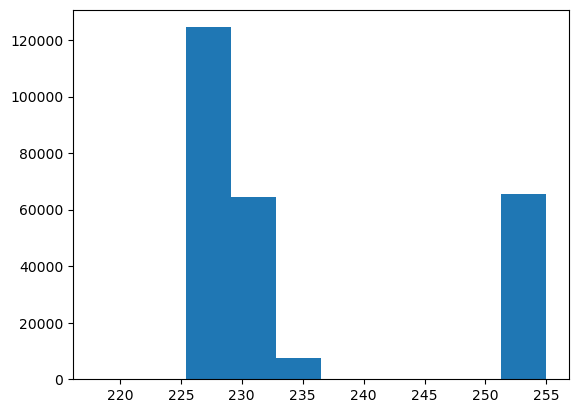

In [54]:
plt.hist(tile_arr.flatten())

### Visualise skipped or not skipped tiles

In [90]:
non_background_min = PATCH_VALUES*.05
tissue_min = PATCH_VALUES*REQ_TISSUE_RATIO
background_cutoff = 220

# check more than 5% is non-white or 
if np.sum(tile_arr < background_cutoff) < int(non_background_min) or \
np.count_nonzero(tile_arr==0) < tissue_min:
    print('skip tile')


skip tile


skip tile


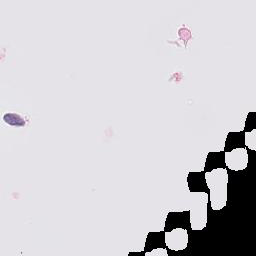

In [219]:
x, y = 68000, 9000
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]

nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

skip tile


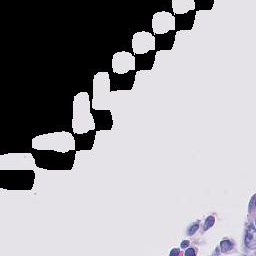

In [218]:
x, y = 63000, 1500
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]


# number of zero pixels plus number of background pixels
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

skip tile


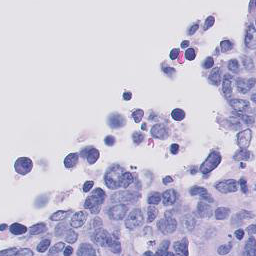

In [217]:
x, y = 63000, 1700
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]


# number of zero pixels plus number of background pixels
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

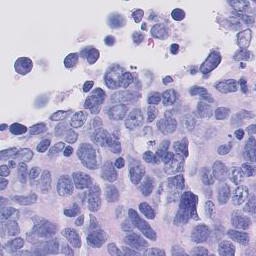

In [216]:
x, y = 63000, 1800
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]


# number of zero pixels plus number of background pixels
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

skip tile


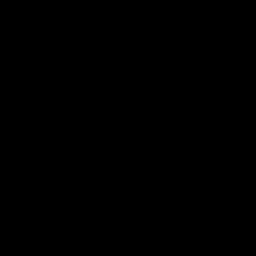

In [215]:
x, y = 20000, 1800
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]


# number of zero pixels plus number of background pixels
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

skip tile


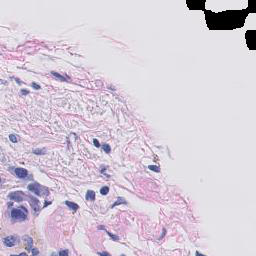

In [214]:
x, y = 36000, 1000
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]


# number of zero pixels plus number of background pixels
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

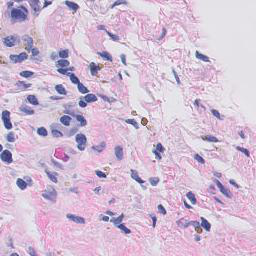

In [213]:
x, y = 36000, 1200
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]


# number of zero pixels plus number of background pixels
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    print('skip tile')

tile

In [199]:
np.count_nonzero(tile_arr==0)

0

In [174]:
len(tile_arr.nonzero()[0])

196608

### Compare times to use different non zero approaches

In [210]:
import time
start = time.time()

test = np.count_nonzero(tile_arr==0) + \
np.sum(tile_arr[np.nonzero(tile_arr)] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS

end = time.time()
print(end-start)
print(test)

0.004592418670654297
False


In [211]:
import time
start = time.time()

nz = np.nonzero(tile_arr)
test = NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS

end = time.time()
print(end-start)
print(test)

0.004395008087158203
False


### Use condition:
```
nz = np.nonzero(tile_arr)
if NUM_PATCH_PIXELS - len(nz[0]) + \
np.sum(tile_arr[nz] > background_cutoff) > MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
    # skip tile
```

after loading image via
```
x, y = 63000, 1700
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile_arr = np.array(tile)[..., :3]

```

### Move through patches with stride across graph

Pre-record which patches we are using i.e. image_id and coordinates x,y. So still read patches in real time but only read from list of non-skippable ones.

For each slide, record which are the good patches.

In [308]:
patch_df = pd.DataFrame(columns=['image_id', 'x_coord', 'y_coord'])
patch_df

,image_id,x_coord,y_coord


In [269]:
# Fastest method to add row
patch_df = pd.concat([patch_df, pd.DataFrame.from_dict({'image_id': 'test', 
                                                        'x_coord': [0], 'y_coord':[0]})])


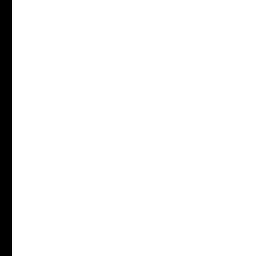

In [295]:
x, y = 69888, 1700
tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
tile#_arr = np.array(tile)[..., :3]

In [309]:
# for each WSI

# for x in 128 increments across width
    # for y in 128 increments across width
        # -- edge cases: if x or y > dims then will pad with white which will be skipped
        
        # load tile
        # if not skip
            # save patch coords by adding to df
        
start = time.time()

slide_patch_df = pd.DataFrame(columns=['image_id', 'x_coord', 'y_coord'])

 
wsi_size = wsi.dimensions

for x in range(0, wsi_size[0], STRIDE):
    for y in range(0, wsi_size[1], STRIDE):
        # load tile
        tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
        tile_arr = np.array(tile)[..., :3]
        
        nz = np.nonzero(tile_arr)
        if NUM_PATCH_PIXELS - len(nz[0]) + \
            np.sum(tile_arr[nz] > background_cutoff) <= MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
            # add to patch_df
            slide_patch_df = pd.concat([slide_patch_df, pd.DataFrame.from_dict({'image_id': image_id, 
                                                            'x_coord': [x], 'y_coord':[y]})],
                                  ignore_index=True)

end = time.time()
print(end-start)

271.66171979904175


Took 271 seconds for one WSI

#### For all image_ids

In [324]:
image_ids = list(map(lambda img: img[:-4], tif_imgs))

In [328]:
background_cutoff = 220

patch_df = pd.DataFrame(columns=['image_id', 'x_coord', 'y_coord'])

for image_id in image_ids:
    start = time.time()
    
    wsi = openslide.OpenSlide(os.path.join(IMAGE_DIR, f"{image_id}.tif"))
    wsi_size = wsi.dimensions
    
    slide_patch_df = pd.DataFrame(columns=['image_id', 'x_coord', 'y_coord'])

    for x in range(0, wsi_size[0], STRIDE):
        for y in range(0, wsi_size[1], STRIDE):
            # load tile
            tile = wsi.read_region((x, y), level=0, size=(PATCH_SIZE, PATCH_SIZE))
            tile_arr = np.array(tile)[..., :3]
            
            nz = np.nonzero(tile_arr)
            if NUM_PATCH_PIXELS - len(nz[0]) + \
                np.sum(tile_arr[nz] > background_cutoff) <= MIN_TISSUE_RATIO*NUM_PATCH_PIXELS:
                # add to patch_df
                slide_patch_df = pd.concat([slide_patch_df, pd.DataFrame.from_dict({'image_id': image_id, 
                                                                'x_coord': [x], 'y_coord':[y]})],
                                      ignore_index=True)
    
    
    patch_df = pd.concat([patch_df, slide_patch_df], ignore_index=True)
    
    end = time.time()
    print(f'Found {len(slide_patch_df)} patches for image {image_id} in {(end-start):.0f} seconds')


Found 20576 patches for image 15871 in 240 seconds
Found 24506 patches for image 40129 in 490 seconds
Found 50259 patches for image 44962 in 739 seconds
Found 17865 patches for image 60685 in 424 seconds
Found 22008 patches for image 32432 in 262 seconds
Found 21975 patches for image 8985 in 582 seconds
Found 236 patches for image 31594 in 3 seconds
Found 32886 patches for image 18914 in 390 seconds
Found 46728 patches for image 19157 in 713 seconds
Found 97982 patches for image 15188 in 1110 seconds
Found 105551 patches for image 65094 in 1137 seconds
Found 41373 patches for image 33984 in 499 seconds
Found 17320 patches for image 62641 in 212 seconds
Found 39609 patches for image 45725 in 626 seconds
Found 28155 patches for image 43998 in 517 seconds
Found 30054 patches for image 14617 in 318 seconds
Found 10813 patches for image 54506 in 271 seconds
Found 7408 patches for image 14039 in 97 seconds
Found 18025 patches for image 6582 in 372 seconds
Found 85819 patches for image 15231 

Found 37691 patches for image 49587 in 982 seconds
Found 41658 patches for image 6175 in 592 seconds
Found 65230 patches for image 57711 in 801 seconds
Found 6240 patches for image 25561 in 235 seconds
Found 41244 patches for image 25928 in 469 seconds
Found 16065 patches for image 7204 in 270 seconds
Found 60751 patches for image 39172 in 649 seconds
Found 30087 patches for image 26190 in 641 seconds
Found 13421 patches for image 47911 in 328 seconds
Found 66521 patches for image 18810 in 1008 seconds
Found 35669 patches for image 61493 in 428 seconds
Found 8159 patches for image 16494 in 312 seconds
Found 22939 patches for image 40079 in 236 seconds
Found 85663 patches for image 65022 in 1000 seconds
Found 43133 patches for image 10642 in 926 seconds
Found 46370 patches for image 18547 in 524 seconds
Found 29799 patches for image 34690 in 423 seconds
Found 37782 patches for image 22155 in 572 seconds
Found 32448 patches for image 39208 in 524 seconds
Found 54998 patches for image 186

Found 56784 patches for image 64950 in 898 seconds
Found 10392 patches for image 63836 in 127 seconds
Found 36846 patches for image 14312 in 618 seconds
Found 76660 patches for image 30369 in 1019 seconds
Found 1502 patches for image 61100 in 198 seconds
Found 40865 patches for image 23629 in 538 seconds
Found 26520 patches for image 5307 in 596 seconds
Found 72537 patches for image 60928 in 1245 seconds
Found 15959 patches for image 16876 in 205 seconds
Found 15587 patches for image 22489 in 300 seconds
Found 16241 patches for image 36639 in 256 seconds
Found 76606 patches for image 52752 in 1040 seconds
Found 30980 patches for image 1774 in 563 seconds
Found 10409 patches for image 31473 in 181 seconds
Found 30937 patches for image 21373 in 482 seconds
Found 42605 patches for image 65300 in 683 seconds
Found 42382 patches for image 28562 in 697 seconds
Found 60194 patches for image 65371 in 705 seconds
Found 319 patches for image 13568 in 4 seconds
Found 52764 patches for image 43671

Found 22325 patches for image 56843 in 398 seconds
Found 26715 patches for image 1952 in 482 seconds
Found 61547 patches for image 12442 in 1261 seconds
Found 25076 patches for image 5264 in 345 seconds
Found 54365 patches for image 44530 in 946 seconds
Found 85460 patches for image 37190 in 1448 seconds
Found 23311 patches for image 4827 in 573 seconds
Found 14611 patches for image 1101 in 165 seconds
Found 14839 patches for image 34688 in 188 seconds
Found 45046 patches for image 43280 in 817 seconds
Found 39374 patches for image 8130 in 721 seconds
Found 48073 patches for image 27739 in 759 seconds
Found 26928 patches for image 30868 in 635 seconds
Found 56261 patches for image 40124 in 784 seconds
Found 19301 patches for image 53900 in 706 seconds
Found 27014 patches for image 39728 in 441 seconds
Found 36850 patches for image 14127 in 428 seconds
Found 32521 patches for image 1660 in 635 seconds
Found 38594 patches for image 34649 in 616 seconds
Found 14504 patches for image 49995

In [329]:
patch_df.to_csv('train_patches.csv')

### For inference will do this differently

Will need to deal with one slide at a time i.e. batch_size=1 probably.

Also, only need to use each tile once so can check quality in real time.

In [331]:
pd.read_csv('train_patches.csv', index_col=0)

,image_id,x_coord,y_coord
0,15871,512,10368
1,15871,512,10496
2,15871,512,10624
3,15871,640,8704
4,15871,640,8832
...,...,...,...
20021307,38687,60928,7424
20021308,38687,60928,7552
20021309,38687,60928,7808
20021310,38687,61056,7296


In [332]:
len(patch_df)

20021312

20 million tiles at size 256*256 with stride 128 (50%)